### Student Information
Name: 鄭振慈 Patrick Thelysander

Student ID: 61347113S

GitHub ID: Osiris181

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [132]:
### Begin Assignment Here

# import needed libraries
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
# from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap
import plotly.express as px
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to C:\Users\Patrick
[nltk_data]     Thelysander\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Re-Doing Phase 1**
1. Data Source
2. Data Preparation
3. Data Transformation
 - 3.1 Converting Dictionary into Pandas dataframe
 - 3.2 Familiarizing yourself with the Data
4. Data Mining using Pandas
 - 4.1 Dealing with Missing Values
 - 4.2 Dealing with Duplicate Data
5. Data Preprocessing
 - 5.1 Sampling
 - 5.2 Feature Creation
 - 5.3 Feature Subset Selection
 - 5.4 Atrribute Transformation / Aggregation
   - 5.4.1 Transform Text Data

## 1. Data Source

In [64]:
#Read data from CSV file and display the first 3 rows as a testing
data = pd.read_csv('./newdataset/Reddit-stock-sentiment.csv')
data.head(3)

# print(len(data))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0


## 2. Data Preparation

### Exercise 1
Since Exercise 1 requires me to print the first 3 text data of the samples, I chose the title as the columns that I want to print

In [10]:
for x in range(3):
    print(f"Sample Title {x+1}:")
    print(data.title[x], "\n")

Sample Title 1:
Retardation is on the menu boys! WSB is so back 

Sample Title 2:
Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history 

Sample Title 3:
How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision? 



## 3. Data Transformation

In [ ]:
#check the number of samples from the datasets
len(data)

847

### Exercise 2
Experiment with other queries method to acquire the data

In [ ]:
from pandasql import sqldf

#using query
# query = "SELECT * FROM data WHERE type = 'post'"
# acquired = sqldf(query)
# print(acquired.head(5))

#using loc
# data.loc[data['entities'] == '[]']
# data.loc[:3]

#using iloc
# data.iloc[:3, 2:]

upvotes_notzero = data.upvotes != 0
data[upvotes_notzero]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
5,comment,2025-04-12 2:19:03,mmo4k9g,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,https://www.reddit.com/r/wallstreetbets/commen...,16,NaN,NaN,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,"['tonight', 'puss']",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0


In [ ]:
#Trying more queries
# bool_name = data['post_id'] == 'mmijiuz'
# data[bool_name]

# query = "SELECT * FROM data WHERE subreddit == 'wallstreetbets' LIMIT 20"
# result = sqldf(query)
# print(result)

data.loc[0:, 'datetime'] #specify the column name
data.iloc[0:, 1] #search using the column index

0      2025-04-11 17:29:56
1       2025-04-12 1:12:19
2      2025-04-10 15:09:41
3      2023-08-30 17:12:55
4      2025-04-11 14:48:05
              ...         
842     2021-06-30 4:06:06
843     2025-04-11 5:01:24
844    2025-03-24 12:30:39
845    2025-04-11 20:13:26
846     2025-04-12 3:09:06
Name: datetime, Length: 847, dtype: object

### Exercise 3
For this exercise, I decide to fetch the records belonging to the ```comment``` type, and then query the data for every 10 records. I'll show 30 records for this exercise

In [54]:
temp_data = data.loc[data['type'] == 'comment']

# print(temp_data)
temp_data.iloc[::10].head(30)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
11,comment,2025-04-12 2:51:20,mmo9e6r,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,RememberTooSmile,https://www.reddit.com/r/wallstreetbets/commen...,9,NaN,NaN,"this sub has ruined emails for me, whenever I ...",0.300000,1.000000,1.0,"['sub', 'WSB', 'Best']",0.0
21,comment,2025-04-06 23:31:33,mls3ha1,stockstobuytoday,If you had $10k in cash…,Either_Breadfruit_90,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,GEO WM,0.000000,0.000000,0.0,"['GEO', 'WM']",0.0
31,comment,2024-08-17 5:32:56,liiwbkk,stockstobuytoday,Best EV / green mining stocks?,[deleted],https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,$EVGO \r\n\r\n*Record Revenue increasing 5 str...,0.422268,0.107880,1.0,"['Jeep', 'program', 'spike', '+', 'Honda', 'Eq...",0.0
41,comment,2021-05-03 22:17:48,gwu560b,stockstobuytoday,"Shorted Stocks - Hedges crushing NAKD, FAMI, S...",Limp-Project5733,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,And plug,0.000000,0.000000,0.0,['plug'],0.0
52,comment,2025-04-11 15:12:13,mmkq2am,wallstreetbets,[IPO] AIRO IPO: Aerospace & Defense Play at $1...,likeitis121,https://i.redd.it/n22xlqjix7ue1.jpeg,2,NaN,NaN,>I did some digging and found they had a gover...,0.000000,0.000000,0.0,"[']', 'contract', 'Lockheed', 'Defense', 'gove...",-1.0
62,comment,2025-04-11 16:11:48,mml28yw,StockMarket,The Trump administration is begging Xi Jinping...,FumblersUnited,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,Comedy gold :)),1.000000,0.500000,1.0,"['Comedy', 'gold']",-1.0
75,comment,2025-03-27 21:15:26,mk2ot48,stocks,Rate My Portfolio - r/Stocks Quarterly Thread ...,BugDisastrous5135,https://www.reddit.com/r/stocks/comments/1j0w7...,1,NaN,NaN,"""New to investing"" but almost $50k port. Ok th...",0.477273,0.318182,1.0,"['New', 'port']",0.0
85,comment,2024-01-30 17:26:49,kka99fk,stockstobuytoday,Whats up with Alternus Clean Energy?,bottomline77,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Note that clean energy is a promising sector f...,0.580000,0.253333,1.0,"['Trump', 'energy', 'Too', 'Note', 'time', 'pr...",0.0
95,comment,2025-04-11 7:35:26,mmizh0f,StockMarket,Data Shows US Allies—Not China—Dumping Treasuries,macrolidesrule,https://i.redd.it/31r650bss4ue1.jpeg,1,NaN,NaN,Japan and the UK are the two largest holders o...,0.000000,0.000000,0.0,"['UK', 'Japan', 'IIRC', 'T-Bills']",-1.0


## 4. Data Mining Using Pandas

### 4.1 Missing Values

In [ ]:
#checking missing values
import helpers.data_mining_helpers as dmh
data.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


### Exercise 4
Checking the missing values from the row instead of column

In [72]:
# data

data.isnull().apply(lambda x : dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

In [ ]:
# missing_downvotes = data.downvotes.isnull() == True

# print(missing_downvotes)
# data[missing_downvotes]
# data[missing_downvotes] = 0

### Exercise 5
Ensuring all the data that I checked is really empty:

In [109]:
empty_data = data['downvotes'].apply(lambda x : str(x).lower())
empty_data = empty_data.apply(lambda x : True if x in ('nan', 'none', '') else False)

# empty_data.head(3)
print(empty_data.loc[empty_data[0:] == True]) #length = 783, so the data are all really empty instead of a text of nan or none
# empty_data.isnull()

0      True
1      True
2      True
4      True
5      True
       ... 
841    True
842    True
843    True
845    True
846    True
Name: downvotes, Length: 783, dtype: bool


Since an empty data is not good for the dataset and there are 783 records from 847 records in this dataset, it is not a good idea to leave the data be. At first I thought filling the values of 0 to the missing datas would be a good idea, but after researching about handling the missing datas, it turns out if I just insert 0 to the data, my dataset would be biased because of many insertions of 0 therefore making the database becomes bias. Then I also found out that median would be a good idea to use since it is robust to the outliers and suitable for skewed data.

so for balanced data, we can use mode to fill in the data, then for skewed data, median is more preferable, in other hand mode is used for categorical data.

in this case, I would say that it is safe to ignore the missing data, because there are too much missing records of ```upvotes``` and ```downvotes```, which means if I do something to them, it will make the data sooo much biased. Another way to fill in the data would be using a simple machine learning algorithm such as linear regression to learn from the patterns and fill in the data. But again, the sample complete data are too little. So, I'm afraid after I fill in the data, the data would be much skewed than now. But, I'll let it be for the next part and decide whether downvotes and upvotes are actually useful or not. If it's not useful, then I'll just drop the columns.

## 4.2 Duplicate Data
Dealing with duplicate data of this dataset

In [ ]:
#checking the dataset whether it has duplicate data or not

len(data.loc[data.duplicated() == True])

#or the numbers of duplicate can also be acquired by using sum because it will sum all the True values which has a value of 1
#false values is equal to 0
sum(data.duplicated())

0

Since there is no duplicate data, we don't need to drop anything, but if there are some duplicates we can do:

In [ ]:
data.drop_duplicates(keep=False, inplace=True) 
#keep is to tell the function whether to keep the first occurence, last, or none (False)
#inplace is used to save the changes directly to the dataframe

## 5. Data Preprocessing

### 5.1 Sampling
Since I only have 847 records, I'd try to get half of the records as a sample for this dataset, and print first 20 records so that it will not take too much space to print

In [121]:
sample_data = data.sample(423)
sample_data.head(20)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
529,comment,2022-01-10 17:13:39,hs33kj4,stockstobuytoday,List of low float stocks to watch for 2022 is ...,[deleted],https://www.reddit.com/r/stockstobuytoday/comm...,6,NaN,NaN,AERC super low float could rip any day now,0.483333,0.166667,1.0,"['float', 'day', 'AERC']",0.0
535,comment,2025-04-11 22:01:39,mmmywsx,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,apurimac777,https://www.reddit.com/r/wallstreetbets/commen...,11,NaN,NaN,Its pretty clear China's strat is to troll in...,0.691667,0.175000,1.0,"['panic', 'everything', 'tarrifs', '%', 'SPY',...",-1.0
106,comment,2025-04-11 15:07:23,mmkp2zk,StockMarket,The Trump administration is begging Xi Jinping...,Bartallica,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,Over 9000%!,0.000000,0.000000,0.0,['%'],0.0
438,post,2025-03-25 21:15:31,1jjukvz,stockstobuytoday,Commitment of Trader Report,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"Summarized with Highlights, updated weekly be ...",0.000000,0.000000,0.0,"[']', 'Highlights', 'Report', 'EOW', 'Summary'...",0.0
472,comment,2025-04-11 21:19:58,mmmre9f,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,Fantastic_Team_6,https://www.reddit.com/r/wallstreetbets/commen...,24,NaN,NaN,Life is way too fucking long\r\n\r\n\r\nI need...,0.600000,-0.325000,-1.0,"['Life', 'way']",-1.0
303,comment,2021-10-27 14:25:32,hi9121l,stockstobuytoday,"$FCEL, $PLUG $LCID daily tickets",club_trap,https://www.reddit.com/r/stockstobuytoday/comm...,2,NaN,NaN,Are these pumps n dump or are these things we ...,0.000000,0.000000,0.0,"['Are', 'dump']",-1.0
244,comment,2025-04-11 8:24:52,mmj432m,stocks,BREAKING: China raises tariffs on U.S. goods t...,CheetahPatient6926,https://www.reddit.com/r/stocks/comments/1jwku...,-14,NaN,NaN,This is like a pissing contest between Xi and ...,0.300000,0.100000,1.0,"['adult', 'room', 'Xi', 'Trump', 'contest']",0.0
336,comment,2025-04-11 20:50:05,mmmlsem,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,bullrfuk,https://www.reddit.com/r/wallstreetbets/commen...,48,NaN,NaN,"China: ""We are going to build our future on sc...",0.426136,0.184091,1.0,"['technology', 'LMAO', 'future', 'science', 'f...",1.0
772,comment,2021-02-01 20:34:29,gln938x,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",Billib2002,https://www.reddit.com/r/stocks/comments/la34b...,2,NaN,NaN,Even in Greek apps of all places they've been ...,0.500000,0.300000,1.0,"['lmao', 'Greek', 'apps']",0.0
838,comment,2021-04-26 20:17:28,gvyyjqb,stockstobuytoday,"Stocks with high Short Float. $AAL, $CLVS, $SD...",Chief-Default,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,I am all in,0.000000,0.000000,0.0,[],0.0


### Exercise 6
Comparing the original dataframe and the sampled dataframe

In [ ]:
print(data.head(20))
print(sample_data.head(20))

#again the difference would be the different index since sampling takes random data from the original dataset and put it inside
#so the index would not be ordered ascendingly

       type             datetime  post_id         subreddit  \
0   comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1   comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2   comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3      post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4   comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   
5   comment   2025-04-12 2:19:03  mmo4k9g    wallstreetbets   
6   comment  2025-04-11 12:37:23  mmjx7vz            stocks   
7   comment  2025-04-11 17:28:50  mmlhxwc    wallstreetbets   
8   comment  2021-02-01 15:36:32  gllyi5z            stocks   
9   comment  2021-12-31 16:29:49  hqp3kt4  stockstobuytoday   
10  comment  2025-04-11 15:19:19  mmkri9d            stocks   
11  comment   2025-04-12 2:51:20  mmo9e6r    wallstreetbets   
12  comment   2025-04-11 5:55:28  mmipka9            stocks   
13  comment  2025-03-04 23:49:37  mg20s26            stocks   
14  comment  2025-04-11 13:46:40  mmk9151            st

Print the Barchart of the type

<Axes: xlabel='type', ylabel='amount'>

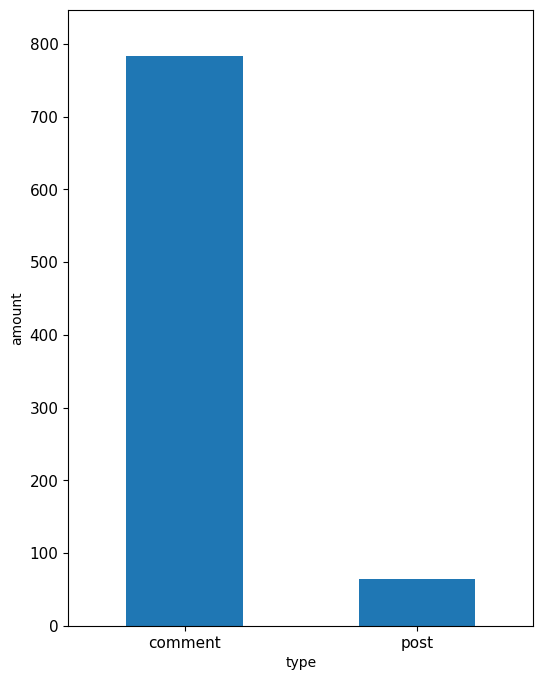

In [128]:
data.type.value_counts().plot(
    kind='bar',
    figsize=[6,8],
    fontsize=11,
    rot=0,
    ylim=[0, len(data)],
    ylabel=('amount')
)

### Exercise 7
I'd consider to use another way to plot the graph and make the y limit based on the maximum value of y

[Text(0, 2, '783'), Text(0, 2, '64')]

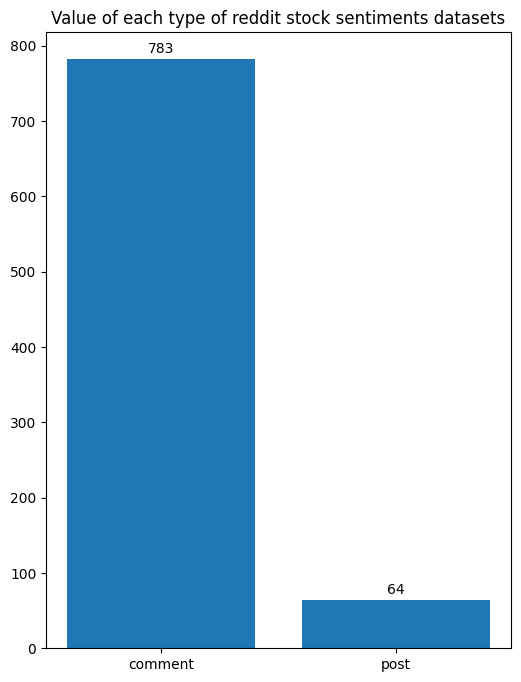

In [150]:
fig, ax = plt.subplots(figsize=(6,8))
type_value = data.type.value_counts()
bars = ax.bar(type_value.index, type_value.values)
ax.set_title("Value of each type of reddit stock sentiments datasets")
ax.set_ylim(bottom=0, top=max(type_value)+35)
ax.bar_label(bars, padding=2)

### Exercise 8
plot the bar graph of the sample and original data within the same figure

[0 1]


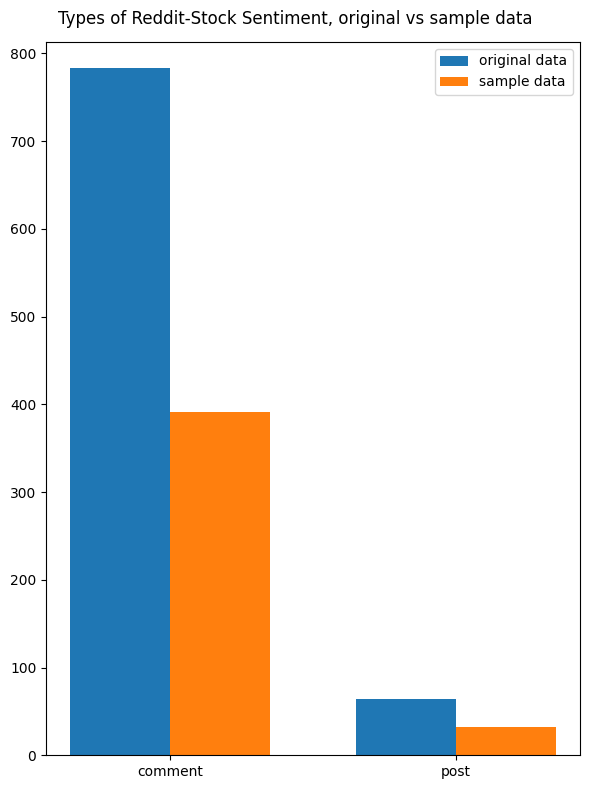

In [ ]:
fig, ax = plt.subplots(figsize=(6,8))
fig.suptitle("Types of Reddit-Stock Sentiment, original vs sample data")

original_val = data.type.value_counts()
sample_val = sample_data.type.value_counts()

width= 0.35

index = np.arange(len(original_val.index))
print(index)

original_bar = ax.bar(index - width/2, original_val.values, width=width, label="original data")
sample_bar = ax.bar(index + width/2, sample_val.values, width=width, label="sample data")

#set the interval of x with the arange of NDArray, set the labels too
ax.set_xticks(index)
ax.set_xticklabels(original_val.index)
ax.set_ylim(0, max(original_val) + 30)
ax.legend()

plt.tight_layout()
plt.show()

# sample_val

## 5.2 Feature Creation

In [192]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to C:\Users\Patrick
[nltk_data]     Thelysander\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Patrick
[nltk_data]     Thelysander\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
data['unigrams'] = data['text'].apply(lambda x: dmh.tokenize_text(x)) #dmh uses the nltk package

In [199]:
print(data[0:4]['unigrams'], '\n')
print(list(data[0:4]['unigrams']))

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object 

[['Calls', 'on', 'retards'], ['Stunt', 'as', 'in', 'like', 'why', 'did', 'they', 'even', 'make', 'a', 'big', 'deal', 'about', 'starting', 'it', 'in', 'the', 'first', 'place', '?', 'No', 'company', 'should', 'ever', 'talk', 'about', 'politics', 'ever', '.'], ['Seeing', 'lots', 'of', 'red', 'in', 'the', 'ticker', '.'], ['Vision', 'Marine', 'Technologies', 'Inc.', 'is', 'rewriting', 'the', 'watercraft', 'rulebook', '.', 'Their', 'collaboration', 'with', 'Shaun', 'Torrente', 'has', 'achieved', 'the', 'unthinkable', '–', 'a', 'blazing', '116', 'mph', 'on', 'water', '!', 'This', 'is', "n't", 'just', 'about', 'speed', ';', 'it', "'s", 'about', 'propelling', 'electric', 'boating', 'into', 'a', 'new', 'era', '.', 'Their', 'cutting-edge', 'technolo

## 5.3 Feature Selection

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

feature_extract = CountVectorizer()
data_feature_count = feature_extract.fit_transform(data.text)
print(data_feature_count[0])

  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1


### Exercise 9
use the analyzer to tokenize the text

In [236]:
analyzer = feature_extract.build_analyzer()
analyzer(data.loc[np.random.randint(len(data)), 'text'])

['the',
 'retailers',
 'will',
 'be',
 'pounded',
 'in',
 'the',
 'pooper',
 'at',
 'the',
 'next',
 'earnings',
 'report',
 'until',
 'then',
 'it',
 'all',
 'speculation']

In [245]:
feature_extract.get_feature_names_out()
len(feature_extract.get_feature_names_out())

4346

In [248]:
data_feature_count.get_shape()

data_feature_count[10:20, :100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### Exercise 10

In [ ]:
temp_array = data_feature_count[10:20, :100].toarray()

found_words = np.where(temp_array == 1)

for x in found_words:
    print(feature_extract.get_feature_names_out()[x])
# print(temp_array)
# print(found_words)

(array([3, 3, 3]), array([ 8, 29, 77]))
['02' '02' '02']
['10' '15' '25']


['term00', 'term000', 'term01378', 'term02', 'term027', 'term03', 'term06', 'term08', 'term10', 'term100', 'term1000', 'term10000', 'term100k', 'term100x', 'term10k', 'term10ks', 'term10yr', 'term11', 'term116', 'term118']
['doc10', 'doc11', 'doc12', 'doc13', 'doc14', 'doc15', 'doc16', 'doc17', 'doc18', 'doc19']


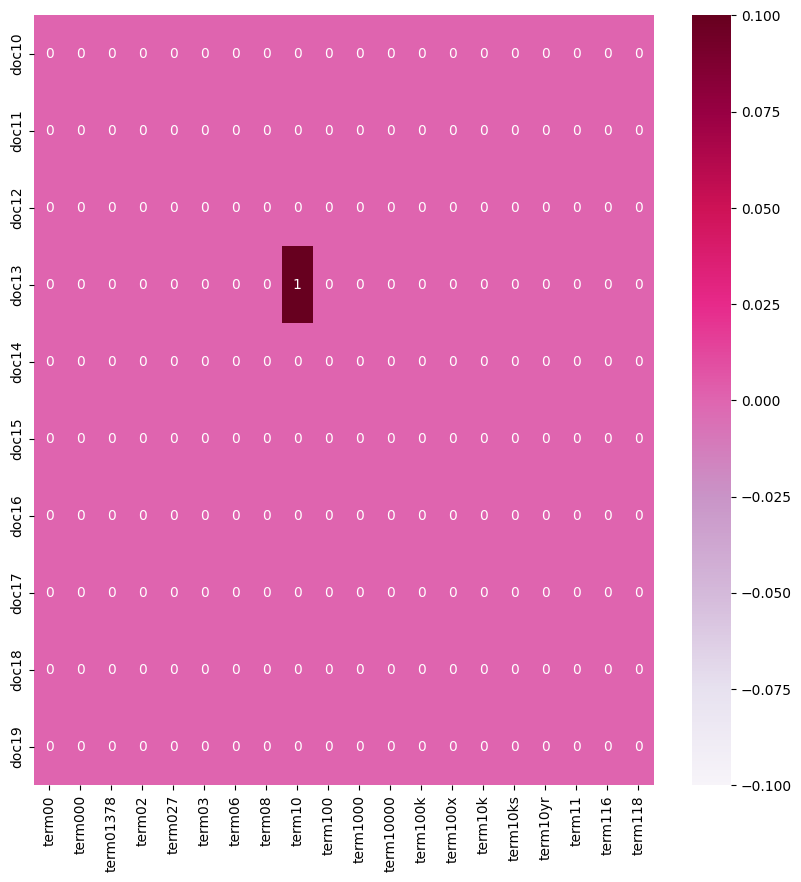

In [280]:
import seaborn as sns

plot_x = ["term" + str(x) for x in feature_extract.get_feature_names_out()[:20]]
plot_y = ['doc' + str(x) for x in list(data.index[10:20])]
plot_z = data_feature_count[10:20, 0:20].toarray()

plot_z

print(plot_x)
print(plot_y)

df = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(10,10))

ax=sns.heatmap(
    df, cmap="PuRd", vmin=0, vmax=0, annot=True
)

### Exercise 11

<Axes: >

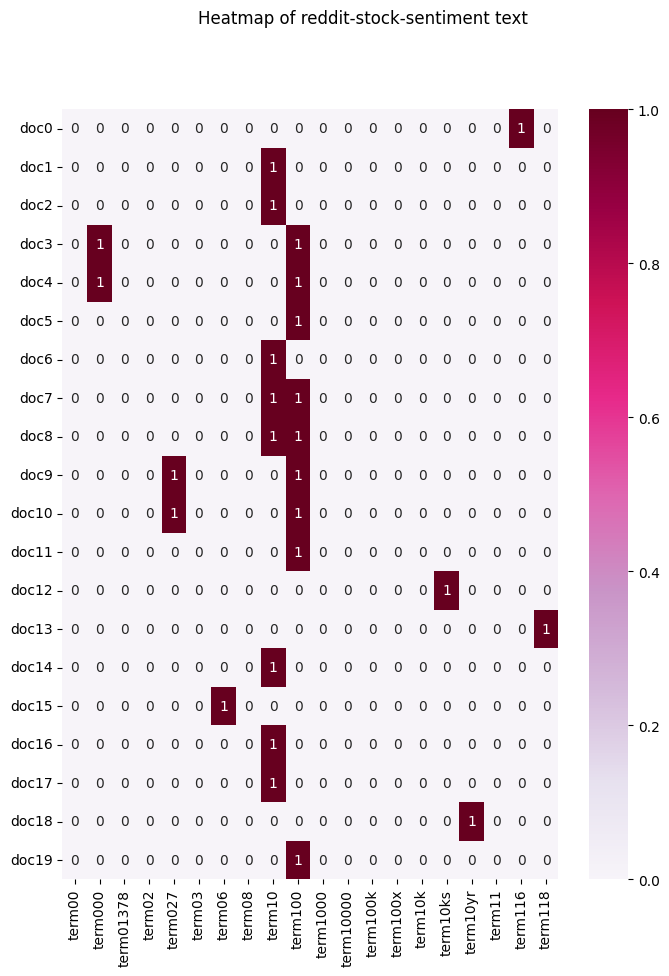

In [293]:
plot_valuable = []

for index, x in enumerate (data_feature_count[0:, 0:20].toarray()):
    for dex, y in enumerate(x):
        if y==1:
            plot_valuable.append(index)
            continue

# plot_valuable

plot_z = data_feature_count[plot_valuable[0:20],0:20].toarray()
plot_y = ['doc' + str(x) for x in data.index[0:20]]
plot_x = ['term'+ str(x) for x in feature_extract.get_feature_names_out()[0:20]]

df = pd.DataFrame(data=plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(8, 10))
plt.suptitle("Heatmap of reddit-stock-sentiment text")
sns.heatmap(
    data=df,
    cmap="PuRd",
    vmin=0,
    vmax=1,
    annot=True
)

##5.4 Attribute Transformation / Aggregation

In [294]:
term_frequencies=[]

for x in range(0, data_feature_count.shape[1]):
    term_frequencies.append(sum(data_feature_count[:, x].toarray()))

In [298]:
term_frequencies = np.asarray(data_feature_count.sum(axis=0))[0]

In [302]:
term_frequencies[0]

np.int64(2)

C:\Users\Patrick Thelysander\AppData\Local\Temp\ipykernel_1828\3097626551.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  graph.set_xticklabels(feature_extract.get_feature_names_out()[:300], rotation=90);


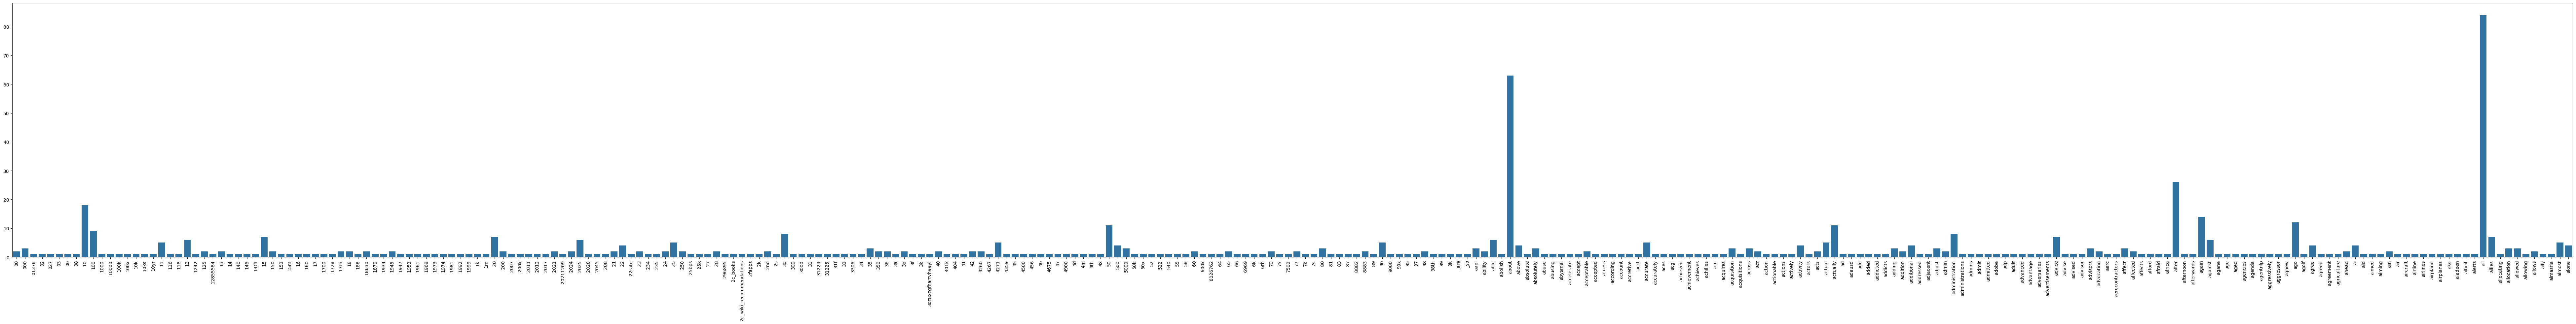

In [312]:
# plt.subplots(figsize=(100, 10))
# g = sns.barplot(x=feature_extract.get_feature_names_out()[:300], 
#             y=term_frequencies[:300])
# g.set_xticklabels(feature_extract.get_feature_names_out()[:300], rotation = 90);

plt.subplots(figsize=(100,10))
graph = sns.barplot(
    x=feature_extract.get_feature_names_out()[:300],
    y=term_frequencies[:300]
)
graph.set_xticklabels(feature_extract.get_feature_names_out()[:300], rotation=90);

### Exercise 12 
Using plotly to plot

In [314]:
fig = px.bar(x=feature_extract.get_feature_names_out()[:300], y=term_frequencies[:300])
fig.update_layout(
    xaxis_title='Terms',
    yaxis_title='Frequencies',
    title={
        'text': 'Terms and Terms Frequencies chart',
        'x': 0.5,
        'xanchor': 'center'
    }
)
fig.show()

### Exercise 13

In [322]:
feature_name = pd.DataFrame(feature_extract.get_feature_names_out().tolist(), columns=["Feature"])
frequency = pd.DataFrame(term_frequencies.tolist(), columns=['Frequencies'])

plot_data = pd.concat([feature_name, frequency], axis=1)
plot_data = plot_data.sort_values(by='Frequencies', ascending=False)

plot_data
fig = px.bar(plot_data[:30], plot_data[:30].Feature, plot_data[:30].Frequencies)
fig.update_layout(
    title={
        'text': 'Terms and Terms Frequencies chart',
        'x': 0.5,
        'xanchor': 'center'
    }
)
fig.show()

### Exercise 14
The same problem

In [ ]:
feature_name = pd.DataFrame(feature_extract.get_feature_names_out().tolist(), columns=["Feature"])
frequency = pd.DataFrame(term_frequencies.tolist(), columns=['Frequencies'])

plot_data = pd.concat([feature_name, frequency], axis=1)
plot_data = plot_data.sort_values(by='Frequencies', ascending=False)

plot_data
fig = px.bar(plot_data[:30], plot_data[:30].Feature, plot_data[:30].Frequencies)
fig.update_layout(
    title={
        'text': 'Terms and Terms Frequencies chart',
        'x': 0.5,
        'xanchor': 'center'
    }
)
fig.show()

### Exercise 15

In [325]:
import math
term_frequencies_log = [math.log(x) for x in term_frequencies]

feature_name = pd.DataFrame(feature_extract.get_feature_names_out().tolist(), columns=["Feature"])
frequency = pd.DataFrame(term_frequencies_log, columns=['Frequencies'])

plot_data = pd.concat([feature_name, frequency], axis=1)
plot_data = plot_data.sort_values(by='Frequencies', ascending=False)

plot_data
fig = px.bar(plot_data[:30], plot_data[:30].Feature, plot_data[:30].Frequencies)
fig.update_layout(
    title={
        'text': 'Terms and Terms Frequencies chart',
        'x': 0.5,
        'xanchor': 'center'
    }
)
fig.show()

# Phase 2

In [ ]:
### Begin Assignment Here